# EDA

# Load dataset

In [1]:
import pandas as pd
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
import seaborn as sns

info_df = pd.read_csv('data/info_df.csv')
utterance_df = pd.read_csv('data/utterance_features.csv')
smile_df = pd.read_csv('data/smile_features.csv')

utterance_columns = utterance_df.columns[1:]
smile_columns = smile_df.columns[1:]

print(f"Info       | # of features: {len(info_df.columns)}")
print(f"Utterance  | # of features: {len(utterance_df.columns)}")
print(utterance_columns)
print(f"Opensmile  | # of features: {len(smile_columns)}")

Info       | # of features: 13
Utterance  | # of features: 38
Index(['Num_Utterances_Ellie', 'Num_Utterances_Participant',
       'Total_Duration_Ellie', 'Total_Duration_Participant',
       'Avg_Utterance_Duration_Ellie', 'Avg_Utterance_Duration_Participant',
       'Total_Interview_Duration', 'Total_Word_Count_Ellie',
       'Total_Word_Count_Participant', 'Avg_Word_Count_Ellie',
       'Avg_Word_Count_Participant', 'Num_Turns', 'Total_Turns',
       'Total_Silence_Duration', 'Avg_Silence_Duration',
       'Max_Silence_Duration', 'Std_Silence_Duration',
       'Silence_Duration_Ratio', 'Avg_Reaction_Time', 'Max_Reaction_Time',
       'Std_Reaction_Time', 'Long_Reaction_Times', 'Avg_Speech_Rate',
       'Std_Speech_Rate', 'Max_Speech_Rate', 'Min_Speech_Rate',
       'Short_Utterance_Speech_Rate', 'Long_Utterance_Speech_Rate',
       'Total_Filler_Count', 'Avg_Fillers_per_Utterance',
       'Total_Emotion_Cue_Count', 'Filler_to_Word_Ratio', 'Emotion_sigh',
       'Emotion_yawn', 'Emoti

In [2]:
merged_df = info_df.merge(utterance_df, on='Participant_ID').merge(smile_df, on='Participant_ID')
merged_df.head()

,Participant_ID,Split,Gender,PHQ8_Binary,PHQ8_Score,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,300,test,1,0,2,NaN,NaN,NaN,NaN,NaN,...,-0.019914,0.008097,0.069432,0.243643,1.131965,0.191049,0.241436,0.690924,1.544863,-31.463453
1,301,test,1,0,3,NaN,NaN,NaN,NaN,NaN,...,-0.021514,0.005452,0.028502,1.320565,1.213828,0.206510,0.217221,0.418650,0.763230,-37.011110
2,302,dev,1,0,4,1.0,1.0,0.0,1.0,0.0,...,-0.024416,0.009156,0.022415,0.735381,1.018794,0.178758,0.177598,0.789830,1.752425,-46.299590
3,303,train,0,0,0,0.0,0.0,0.0,0.0,0.0,...,-0.017102,0.004484,0.024622,1.636067,1.014981,0.189660,0.174769,0.288130,0.515600,-39.244053
4,304,train,0,0,6,0.0,1.0,1.0,2.0,2.0,...,-0.019647,0.003905,0.022772,1.078742,1.261766,0.200920,0.210789,0.485150,0.907032,-41.975723


### Sessions with special notes:
- 373 – there is an interruption around 5:52-7:00, the confederate enters the room to fix a minor 
technical issue, the session continuous and completes . 
- 444 – there is an interruption around 4:46-6:27, the participant’s phone rings and the 
confederate enters the room to help them turn it off. Session continuous and completes. 
- 451, 458, 480 – sessions are technically complete, but missing Ellie (the virtual human) part of the 
transcripts. Participant transcripts are still included, but without the interviewer questions.
- 402 – video recording is cut ~2min before the end of the conversation. 

In [3]:
# Define the full range of Participant_IDs
full_range = set(range(300, 493))

# Find missing Participant_IDs
missing_ids = full_range - set(merged_df['Participant_ID'])
print("Missing Participants (Excluded sessions):", sorted(missing_ids))

Missing Participants (Excluded sessions): [342, 394, 398, 460]


In [4]:
# Drop the specified columns from combined_df
columns_to_drop = ['PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired', 
                   'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving']
df = merged_df.drop(columns=columns_to_drop)

# Save the DataFrame as a CSV file in the 'data' folder
df.to_csv("data/df.csv", index=False)

## Demographic Information (Bar chart)

- Gender: {0: Female, 1: Male}
- PHQ8_Binary: {0: Not depressed (ND), 1: Depressed (D)}

In [5]:
df['GENDER'] = df['Gender'].apply(lambda x: 'F' if x == 0 else 'M')
df['LABEL'] = df['PHQ8_Binary'].apply(lambda x: 'ND' if x == 0 else 'D')

In [6]:
print("Gender value counts:")
print(df['GENDER'].value_counts())

print("\nPHQ8_Binary value counts:")
print(df['LABEL'].value_counts())

Gender value counts:
GENDER
M    102
F     87
Name: count, dtype: int64

PHQ8_Binary value counts:
LABEL
ND    133
D      56
Name: count, dtype: int64


In [7]:
print("------ TRAIN ------\n", df.loc[df['Split']=='train'][['GENDER', 'LABEL']].value_counts())
print("------  DEV  ------\n", df.loc[df['Split']=='dev'][['GENDER', 'LABEL']].value_counts())
print("------  TEST ------\n", df.loc[df['Split']=='test'][['GENDER', 'LABEL']].value_counts())

------ TRAIN ------
 GENDER  LABEL
M       ND       50
F       ND       27
        D        17
M       D        13
Name: count, dtype: int64
------  DEV  ------
 GENDER  LABEL
F       ND       12
M       ND       11
F       D         7
M       D         5
Name: count, dtype: int64
------  TEST ------
 GENDER  LABEL
F       ND       17
M       ND       16
F       D         7
M       D         7
Name: count, dtype: int64


In [8]:
from src import bar_chart, plot_histogram, plot_numeric

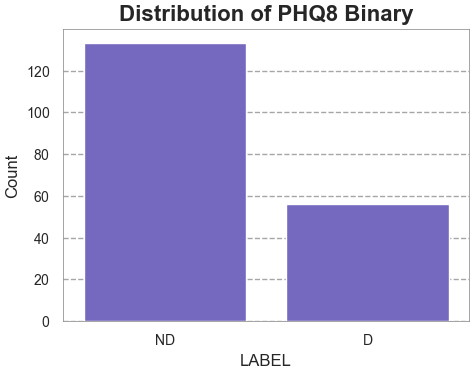

In [29]:
bar_chart(df, 'LABEL', title='Distribution of PHQ8 Binary', option='basic', hue=None)

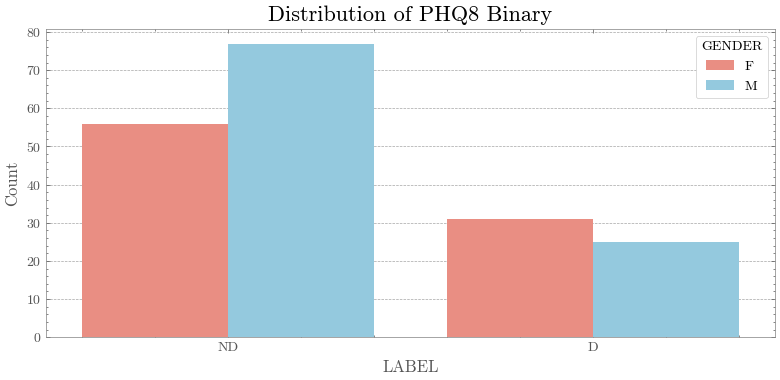

In [10]:
bar_chart(df, 'LABEL', title='Distribution of PHQ8 Binary', option='grouped', hue='GENDER')

<Figure size 500x400 with 0 Axes>

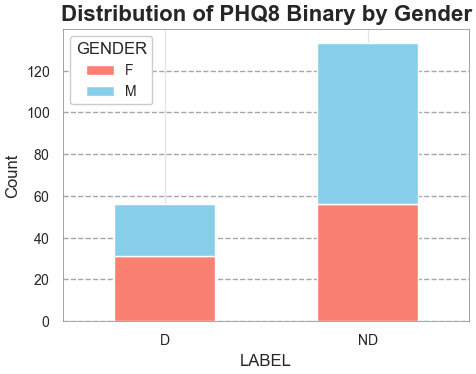

In [30]:
bar_chart(df, 'LABEL', title='Distribution of PHQ8 Binary by Gender', option='stacked', hue='GENDER')

=== Summary Statistics ===
F: Mean = 7.38, SD = 6.39
M: Mean = 6.21, SD = 5.47


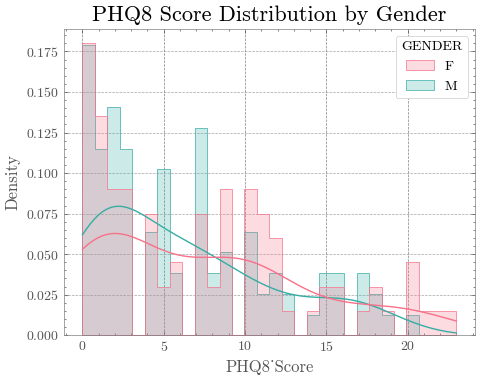

In [12]:
plot_histogram(df,
               column="PHQ8_Score",
               title="PHQ8 Score Distribution by Gender",
               hue="GENDER",)

=== Summary Statistics ===
F: Mean = 7.38, SD = 6.39
M: Mean = 6.21, SD = 5.47
Mann-Whitney U test: U-statistic = 4044.50, p-value = 0.2942


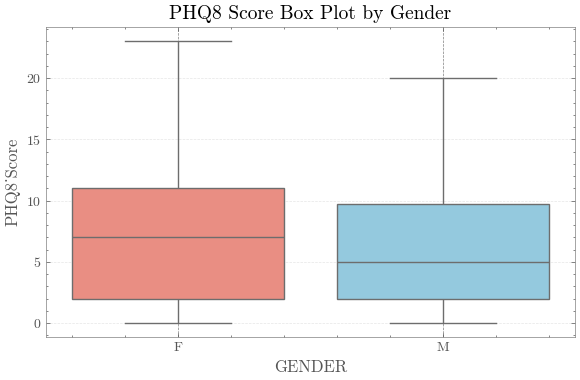

In [13]:
plot_numeric(
    df,
    columns=['PHQ8_Score'],
    title="PHQ8 Score Box Plot by Gender",
    category_col='GENDER',
    palette={'F': 'salmon', 'M': 'skyblue'}
)

## Utterance Features

=== Summary Statistics ===
Overall: Mean = 904.01, SD = 270.13


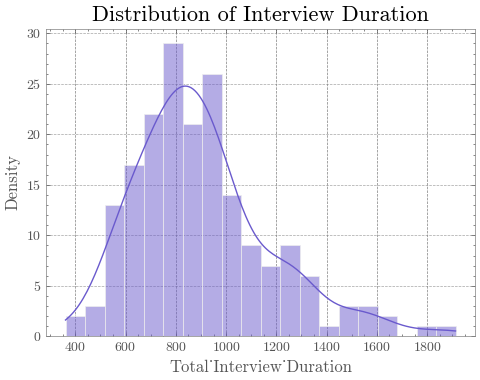

In [14]:
plot_histogram(df, 'Total_Interview_Duration', title='Distribution of Interview Duration', bins=20)

=== Summary Statistics ===
Num_Utterances_Ellie: Mean = 79.36, SD = 17.63
Num_Utterances_Participant: Mean = 171.43, SD = 75.07


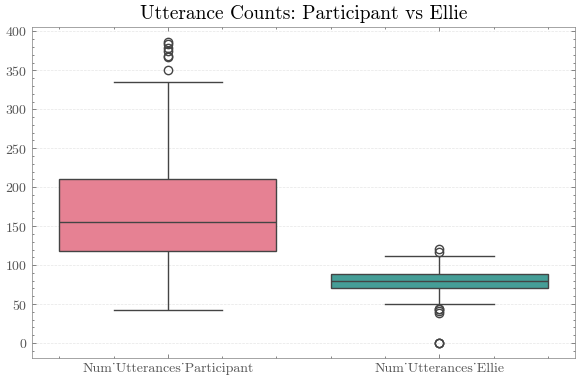

=== Summary Statistics ===
Num_Utterances_Ellie - F: Mean = 77.29, SD = 19.12
Num_Utterances_Ellie - M: Mean = 81.13, SD = 16.13
Num_Utterances_Participant - F: Mean = 176.91, SD = 73.91
Num_Utterances_Participant - M: Mean = 166.76, SD = 76.10


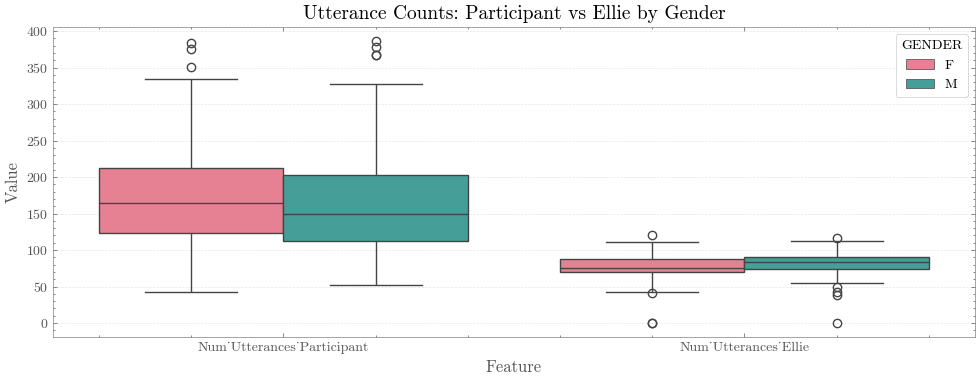

=== Summary Statistics ===
Num_Utterances_Ellie - D: Mean = 83.89, SD = 14.92
Num_Utterances_Ellie - ND: Mean = 77.45, SD = 18.37
Num_Utterances_Participant - D: Mean = 179.59, SD = 84.01
Num_Utterances_Participant - ND: Mean = 168.00, SD = 71.03


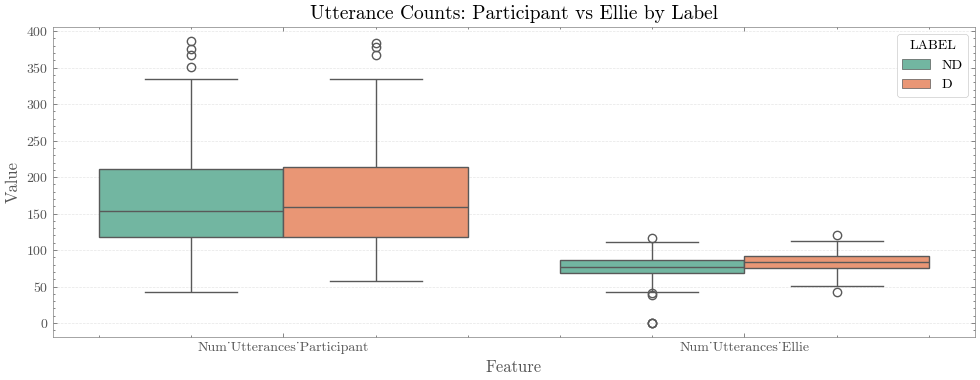

In [15]:
plot_numeric(
    df,
    columns=['Num_Utterances_Participant', 'Num_Utterances_Ellie'],
    title="Utterance Counts: Participant vs Ellie",
)

plot_numeric(df,
             columns=['Num_Utterances_Participant', 'Num_Utterances_Ellie'],
             title="Utterance Counts: Participant vs Ellie by Gender",
             hue='GENDER')

plot_numeric(df,
             columns=['Num_Utterances_Participant', 'Num_Utterances_Ellie'],
             title="Utterance Counts: Participant vs Ellie by Label",
             hue='LABEL',
             palette="Set2")

=== Summary Statistics ===
Avg_Utterance_Duration_Ellie: Mean = 1.78, SD = 0.29
Avg_Utterance_Duration_Participant: Mean = 2.77, SD = 0.98


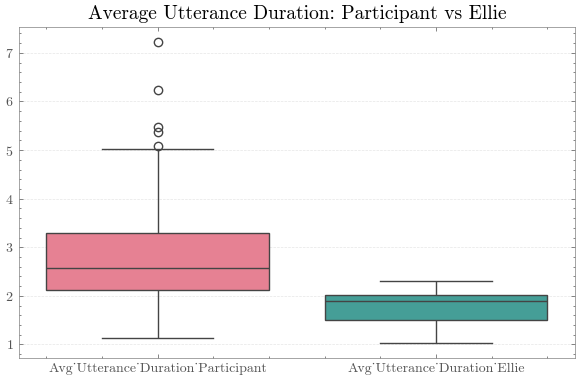

=== Summary Statistics ===
Avg_Utterance_Duration_Ellie - F: Mean = 1.81, SD = 0.28
Avg_Utterance_Duration_Ellie - M: Mean = 1.76, SD = 0.30
Avg_Utterance_Duration_Participant - F: Mean = 2.99, SD = 0.95
Avg_Utterance_Duration_Participant - M: Mean = 2.58, SD = 0.97


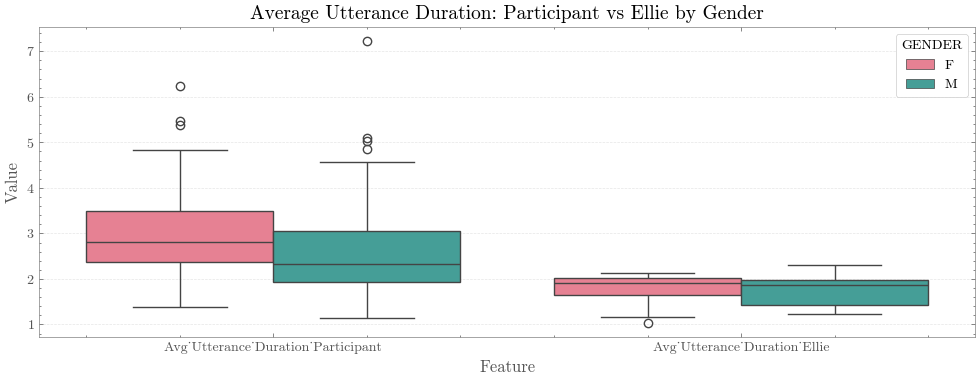

=== Summary Statistics ===
Avg_Utterance_Duration_Ellie - D: Mean = 1.67, SD = 0.31
Avg_Utterance_Duration_Ellie - ND: Mean = 1.83, SD = 0.27
Avg_Utterance_Duration_Participant - D: Mean = 2.72, SD = 0.91
Avg_Utterance_Duration_Participant - ND: Mean = 2.78, SD = 1.01


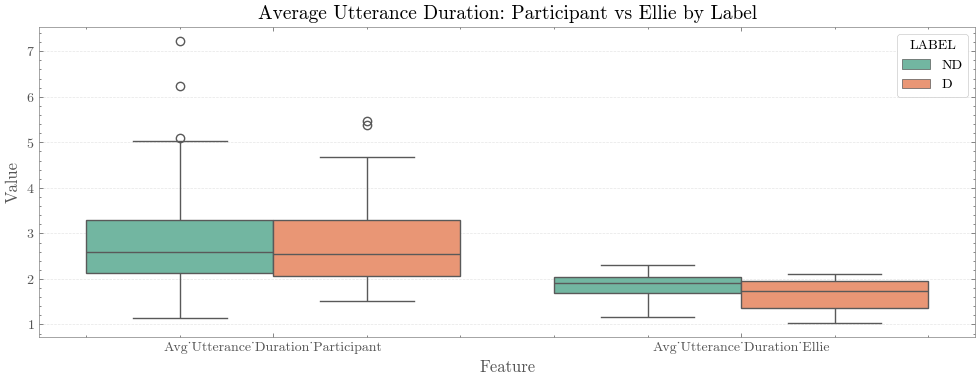

In [16]:
plot_numeric(df,
             columns=['Avg_Utterance_Duration_Participant', 'Avg_Utterance_Duration_Ellie'],
             title="Average Utterance Duration: Participant vs Ellie")
             
plot_numeric(df,
             columns=['Avg_Utterance_Duration_Participant', 'Avg_Utterance_Duration_Ellie'],
             title="Average Utterance Duration: Participant vs Ellie by Gender",
             hue='GENDER')

plot_numeric(df,
             columns=['Avg_Utterance_Duration_Participant', 'Avg_Utterance_Duration_Ellie'],
             title="Average Utterance Duration: Participant vs Ellie by Label",
             hue='LABEL',
             palette="Set2")

=== Summary Statistics ===
D: Mean = 1.24, SD = 0.38
ND: Mean = 1.15, SD = 0.41
Mann-Whitney U test: U-statistic = 3163.00, p-value = 0.1026


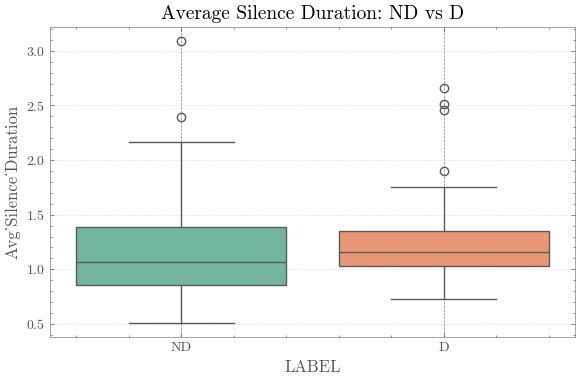

=== Summary Statistics ===
D - F: Mean = 1.15, SD = 0.24
D - M: Mean = 1.35, SD = 0.50
ND - F: Mean = 1.07, SD = 0.43
ND - M: Mean = 1.22, SD = 0.39


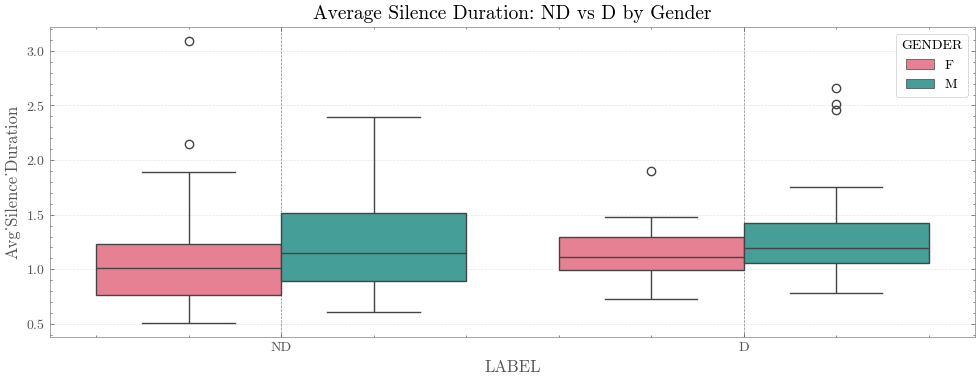

In [17]:
plot_numeric(df,
             columns=['Avg_Silence_Duration'],
             title="Average Silence Duration: ND vs D",
             category_col='LABEL',
             palette="Set2")

plot_numeric(df,
             columns=['Avg_Silence_Duration'],
             title="Average Silence Duration: ND vs D by Gender",
             category_col='LABEL',
             hue='GENDER')

=== Summary Statistics ===
D: Mean = 1.49, SD = 0.61
ND: Mean = 1.18, SD = 0.46
Mann-Whitney U test: U-statistic = 2618.00, p-value = 0.0013


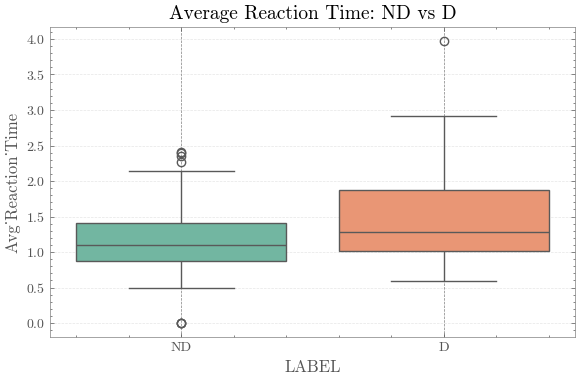

=== Summary Statistics ===
D - F: Mean = 1.29, SD = 0.43
D - M: Mean = 1.73, SD = 0.72
ND - F: Mean = 1.02, SD = 0.34
ND - M: Mean = 1.30, SD = 0.49


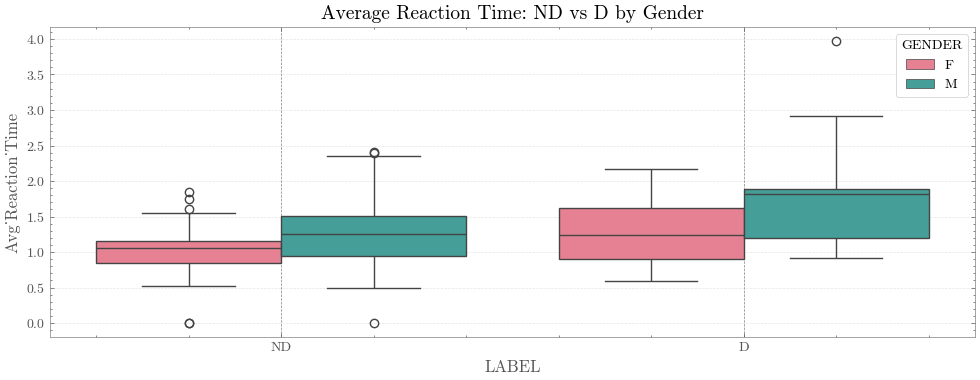

In [18]:
plot_numeric(df,
             columns=['Avg_Reaction_Time'],
             title="Average Reaction Time: ND vs D",
             category_col='LABEL',
             palette="Set2")

plot_numeric(df,
             columns=['Avg_Reaction_Time'],
             title="Average Reaction Time: ND vs D by Gender",
             category_col='LABEL',
             hue='GENDER')

=== Summary Statistics ===
D: Mean = 1488.98, SD = 832.08
ND: Mean = 1463.91, SD = 805.69
Mann-Whitney U test: U-statistic = 3672.00, p-value = 0.8808


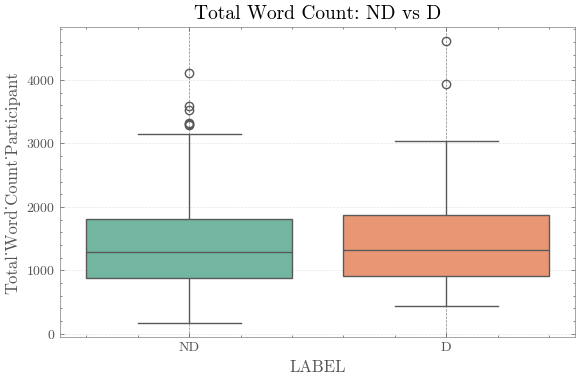

=== Summary Statistics ===
D - F: Mean = 1556.06, SD = 783.16
D - M: Mean = 1405.80, SD = 898.32
ND - F: Mean = 1558.73, SD = 757.38
ND - M: Mean = 1394.95, SD = 837.18


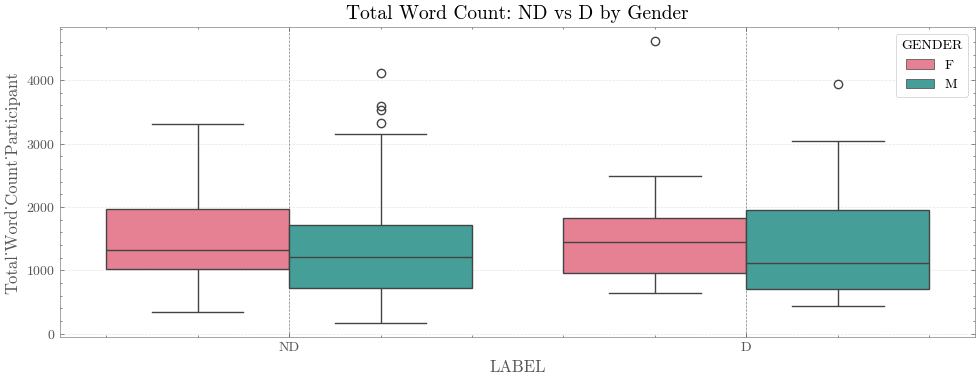

In [19]:
plot_numeric(df,
             columns=['Total_Word_Count_Participant'],
             title="Total Word Count: ND vs D",
             category_col='LABEL',
             palette="Set2")

plot_numeric(df,
             columns=['Total_Word_Count_Participant'],
             title="Total Word Count: ND vs D by Gender",
             category_col='LABEL',
             hue='GENDER')

=== Summary Statistics ===
D: Mean = 2.99, SD = 0.34
ND: Mean = 3.04, SD = 0.48
Mann-Whitney U test: U-statistic = 3954.00, p-value = 0.5039


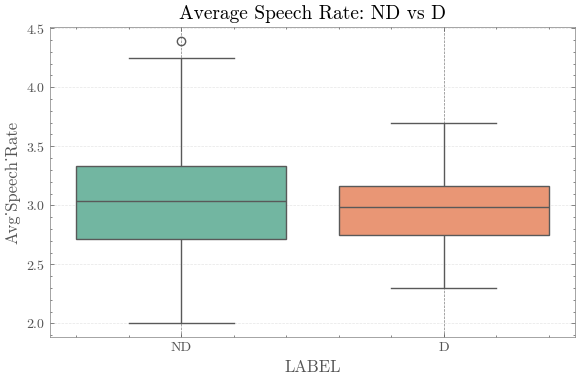

=== Summary Statistics ===
D - F: Mean = 2.96, SD = 0.27
D - M: Mean = 3.02, SD = 0.41
ND - F: Mean = 2.86, SD = 0.38
ND - M: Mean = 3.17, SD = 0.51


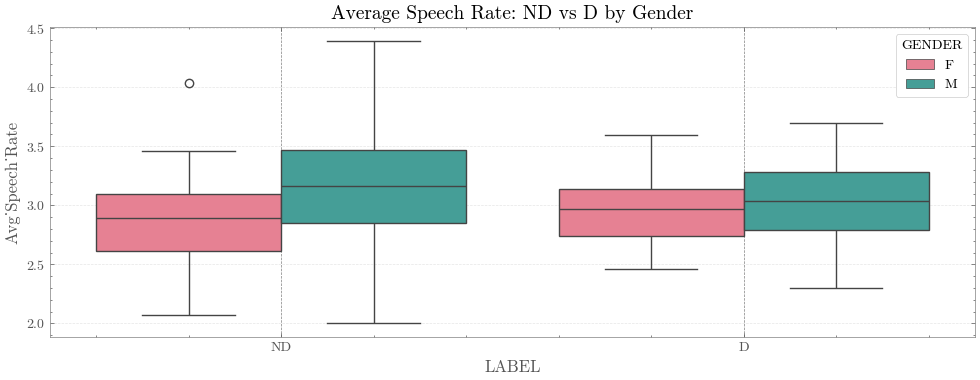

In [20]:
plot_numeric(df,
             columns=['Avg_Speech_Rate'],
             title="Average Speech Rate: ND vs D",
             category_col='LABEL',
             palette="Set2")

plot_numeric(df,
             columns=['Avg_Speech_Rate'],
             title="Average Speech Rate: ND vs D by Gender",
             category_col='LABEL',
             hue='GENDER')

=== Summary Statistics ===
D: Mean = 63.66, SD = 38.79
ND: Mean = 74.32, SD = 53.42
Mann-Whitney U test: U-statistic = 4092.00, p-value = 0.2845


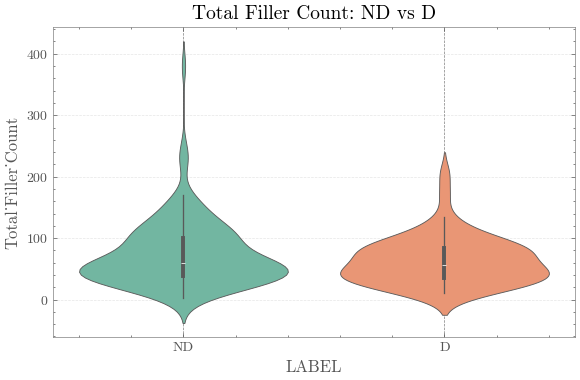

=== Summary Statistics ===
D - F: Mean = 64.48, SD = 38.32
D - M: Mean = 62.64, SD = 40.14
ND - F: Mean = 75.43, SD = 57.46
ND - M: Mean = 73.51, SD = 50.64


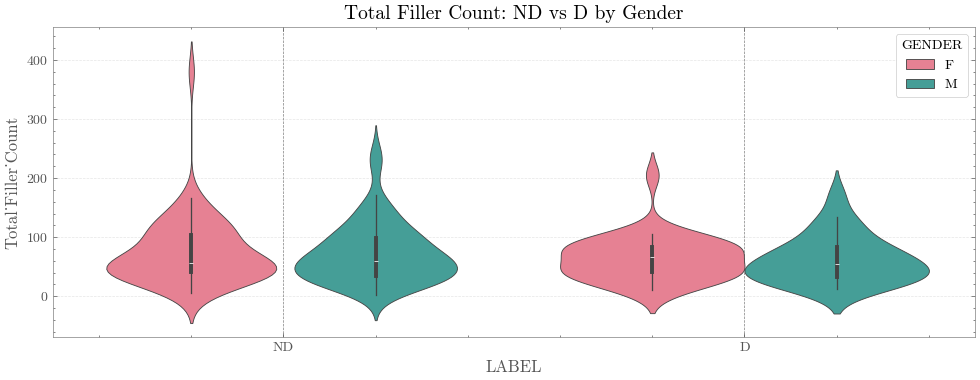

In [21]:
plot_numeric(df,
             columns=['Total_Filler_Count'],
             title="Total Filler Count: ND vs D",
             category_col='LABEL',
             palette="Set2",
             option='violin')

plot_numeric(df,
             columns=['Total_Filler_Count'],
             title="Total Filler Count: ND vs D by Gender",
             category_col='LABEL',
             hue='GENDER',
             option='violin')

=== Summary Statistics ===
D: Mean = 9.23, SD = 8.57
ND: Mean = 7.67, SD = 7.66
Mann-Whitney U test: U-statistic = 3345.00, p-value = 0.2692


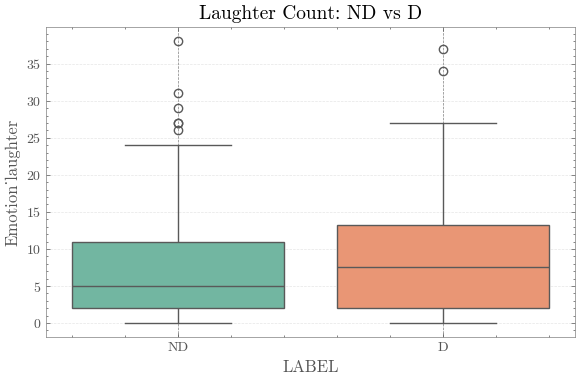

In [22]:
plot_numeric(df,
             columns=['Emotion_laughter'],
             title="Laughter Count: ND vs D",
             category_col='LABEL',
             palette="Set2")

## OpenSMILE Features

=== Summary Statistics ===
D: Mean = 0.97, SD = 0.13
ND: Mean = 0.98, SD = 0.14


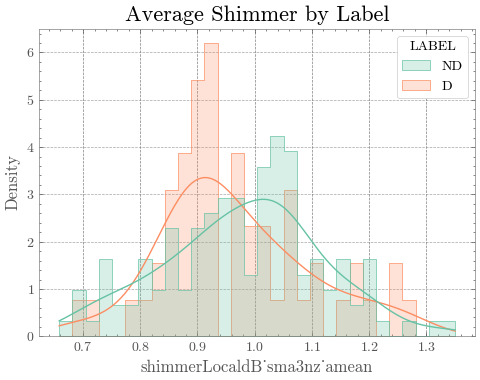

In [23]:
plot_histogram(df,
               column="shimmerLocaldB_sma3nz_amean",
               title="Average Shimmer by Label",
               hue="LABEL",
               palette="Set2")

=== Summary Statistics ===
D: Mean = 0.02, SD = 0.01
ND: Mean = 0.02, SD = 0.00


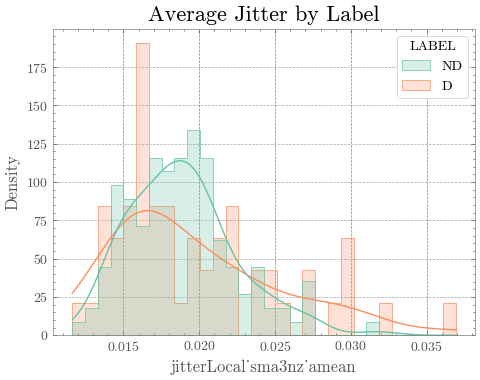

In [24]:
plot_histogram(df,
               column="jitterLocal_sma3nz_amean",
               title="Average Jitter by Label",
               hue="LABEL",
               palette="Set2")

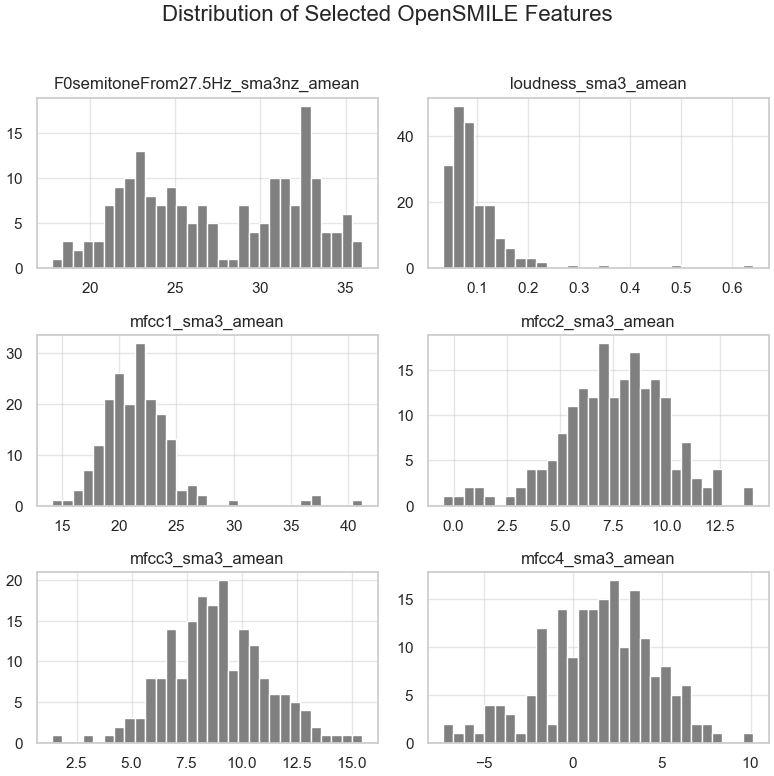

In [25]:
# Set seaborn style
sns.set(style="whitegrid")

# Add more features to visualize
key_features = [
    'F0semitoneFrom27.5Hz_sma3nz_amean', 
    'loudness_sma3_amean', 
    'mfcc1_sma3_amean', 
    'mfcc2_sma3_amean',
    'mfcc3_sma3_amean',
    'mfcc4_sma3_amean',
]

# Plot distributions
df[key_features].hist(bins=30, figsize=(8, 8), layout=(3, 2), color='gray')
plt.suptitle("Distribution of Selected OpenSMILE Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Audio Visualization

In [26]:
from src import plot_audio

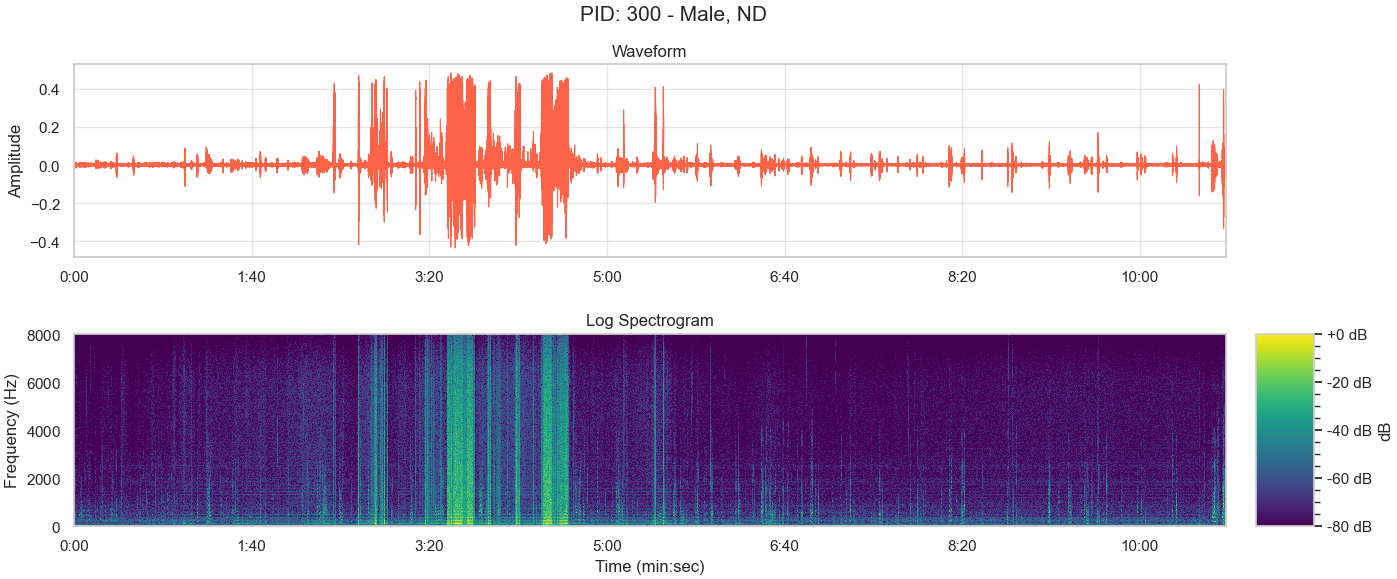

In [27]:
PID = 300

participant_data = df.loc[df['Participant_ID'] == PID]
gender = participant_data['Gender'].values[0]
phq8_binary = participant_data['PHQ8_Binary'].values[0]

plot_audio(PID, gender, phq8_binary)

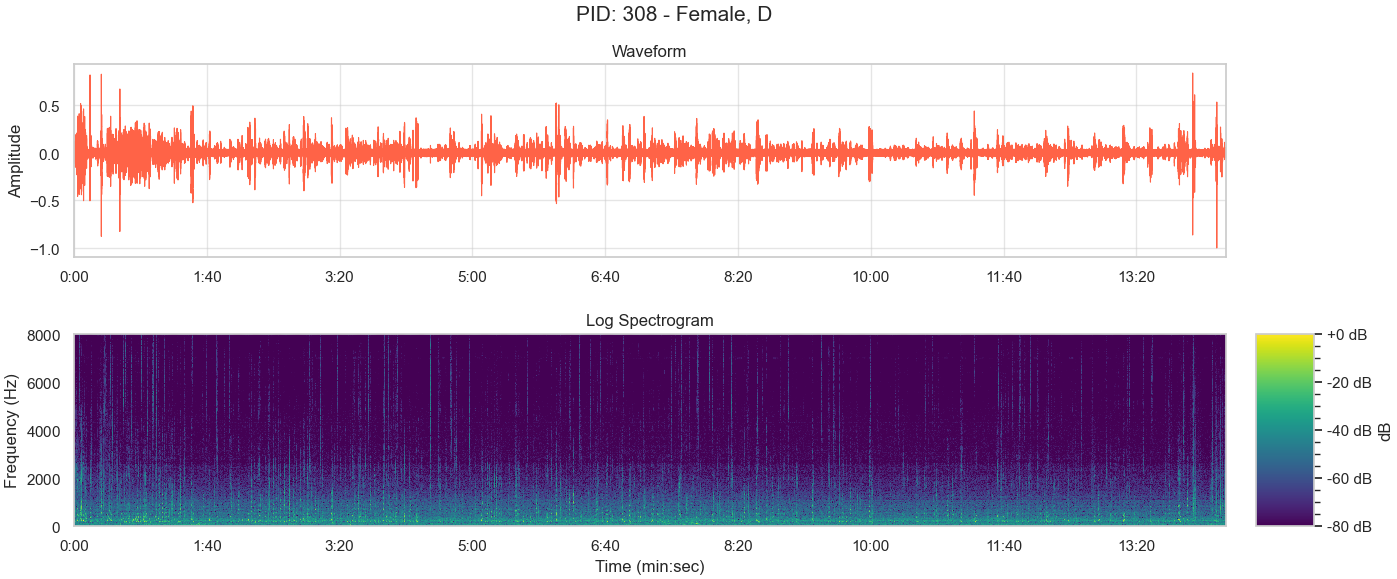

In [28]:
PID = 308

participant_data = df.loc[df['Participant_ID'] == PID]
gender = participant_data['Gender'].values[0]
phq8_binary = participant_data['PHQ8_Binary'].values[0]

plot_audio(PID, gender, phq8_binary)